# Customer Satisfaction in Airline Prediction

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as smi
import pylab
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Preprocesing

In [2]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Data/Invistico_Airline.csv')
df.head(5)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [4]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.mean()

Age                                    39.427957
Flight Distance                      1981.409055
Seat comfort                            2.838597
Departure/Arrival time convenient       2.990645
Food and drink                          2.851994
Gate location                           2.990422
Inflight wifi service                   3.249130
Inflight entertainment                  3.383477
Online support                          3.519703
Ease of Online booking                  3.472105
On-board service                        3.465075
Leg room service                        3.485902
Baggage handling                        3.695673
Checkin service                         3.340807
Cleanliness                             3.705759
Online boarding                         3.352587
Departure Delay in Minutes             14.713713
Arrival Delay in Minutes               15.091129
dtype: float64

In [6]:
df.skew()

Age                                 -0.003606
Flight Distance                      0.466748
Seat comfort                        -0.091861
Departure/Arrival time convenient   -0.252282
Food and drink                      -0.116813
Gate location                       -0.053064
Inflight wifi service               -0.191123
Inflight entertainment              -0.604828
Online support                      -0.575365
Ease of Online booking              -0.491720
On-board service                    -0.505270
Leg room service                    -0.496440
Baggage handling                    -0.743037
Checkin service                     -0.392442
Cleanliness                         -0.756001
Online boarding                     -0.366496
Departure Delay in Minutes           6.821980
Arrival Delay in Minutes             6.670125
dtype: float64

In [7]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [9]:
df.shape

(129880, 22)

### Exploratory Data Analysis

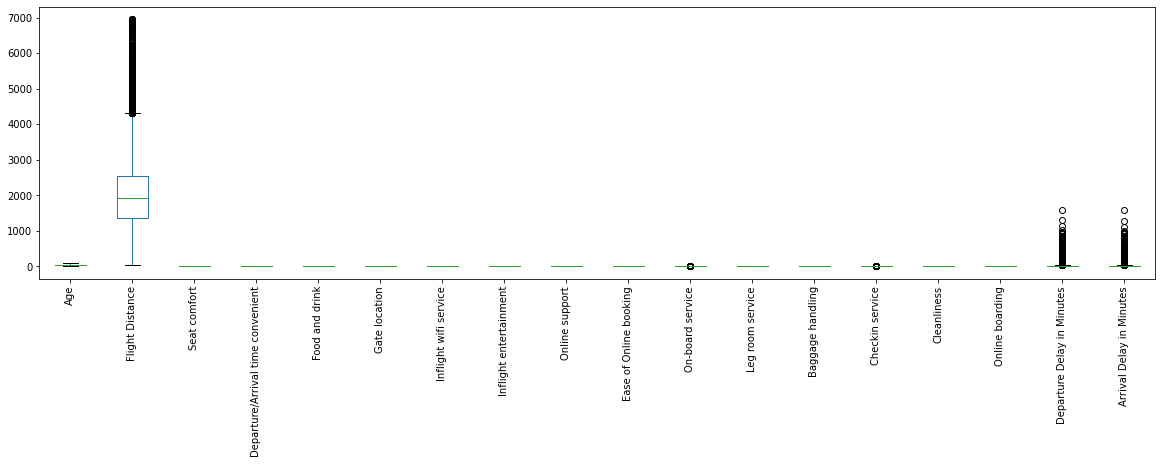

In [41]:
df.boxplot(figsize = (20,5), grid = False)
plt.xticks(rotation=90)
plt.show()

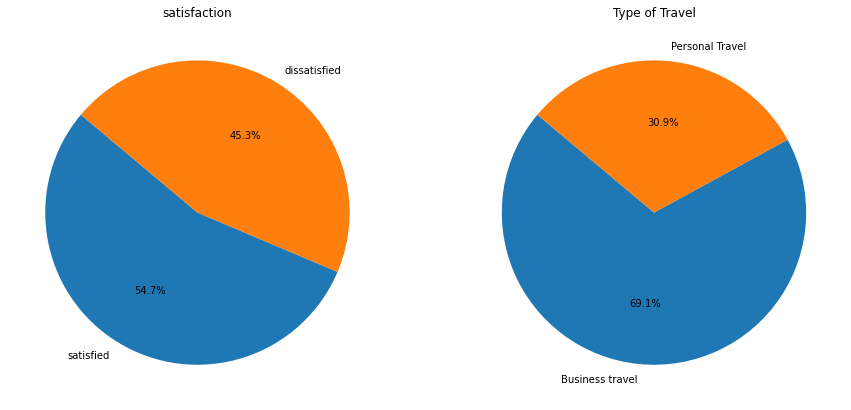

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].pie(df['satisfaction'].value_counts(), labels=df['satisfaction'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('satisfaction')

ax[1].pie(df['Type of Travel'].value_counts(), labels=df['Type of Travel'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Type of Travel')

plt.show()

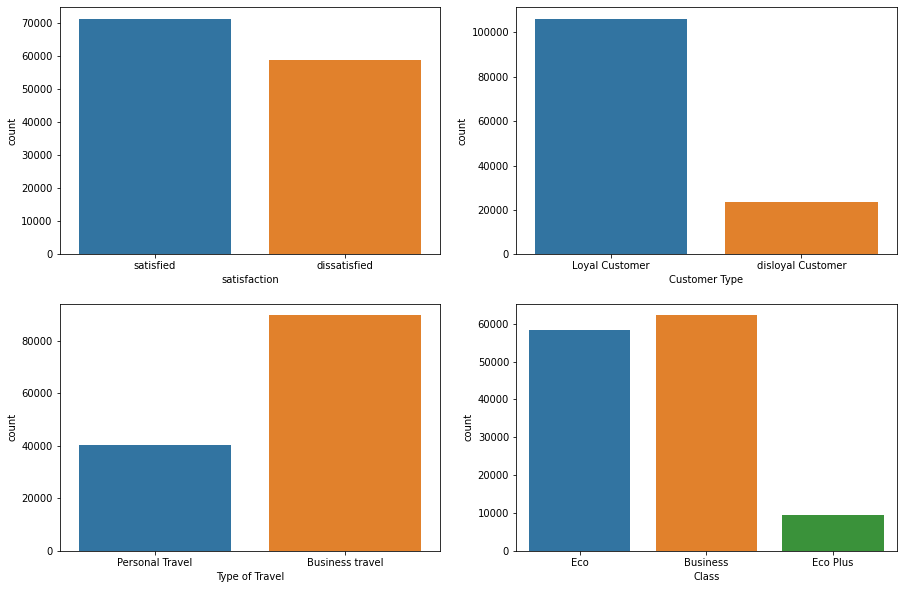

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data = df, x ='satisfaction', ax=ax[0,0])
sns.countplot(data = df, x ='Customer Type', ax=ax[0,1])
sns.countplot(data = df, x ='Type of Travel', ax=ax[1,0])
sns.countplot(data = df, x ='Class', ax=ax[1,1])

plt.show()

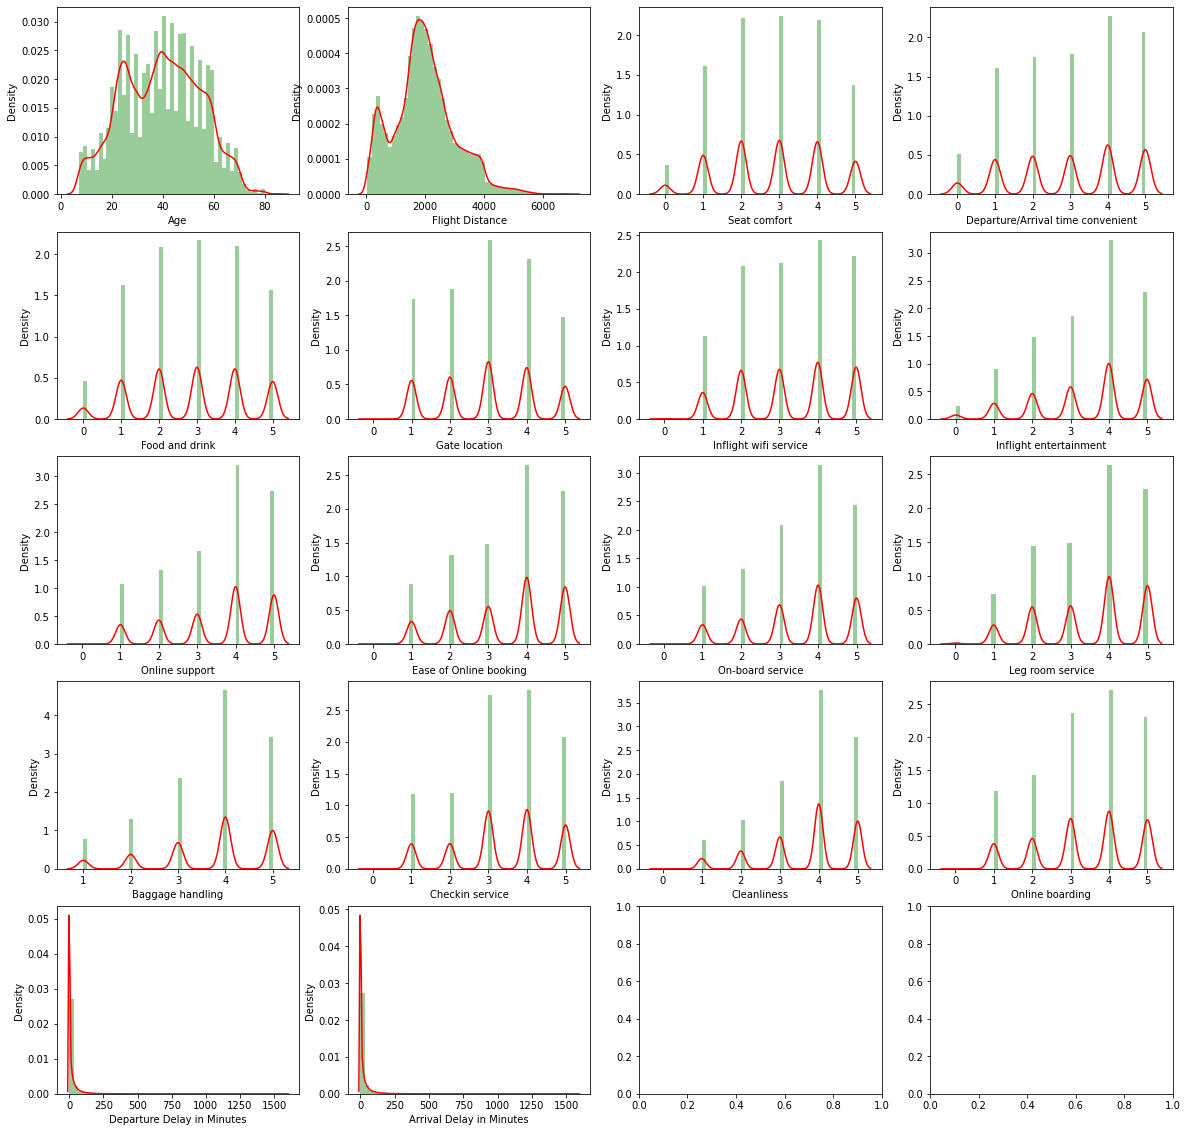

In [15]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))

sns.distplot(df['Age'],ax=ax[0,0], color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Flight Distance'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Seat comfort'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Departure/Arrival time convenient'],ax=ax[0,3],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Food and drink'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Gate location'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Inflight wifi service'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Inflight entertainment'],ax=ax[1,3],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Online support'],ax=ax[2,0],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Ease of Online booking'],ax=ax[2,1],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['On-board service'],ax=ax[2,2],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Leg room service'],ax=ax[2,3],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Baggage handling'],ax=ax[3,0],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Checkin service'],ax=ax[3,1],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Cleanliness'],ax=ax[3,2],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Online boarding'],ax=ax[3,3],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Departure Delay in Minutes'],ax=ax[4,0],  color = 'red', hist_kws={'color': 'green'})
sns.distplot(df['Arrival Delay in Minutes'],ax=ax[4,1],  color = 'red', hist_kws={'color': 'green'})

plt.show()

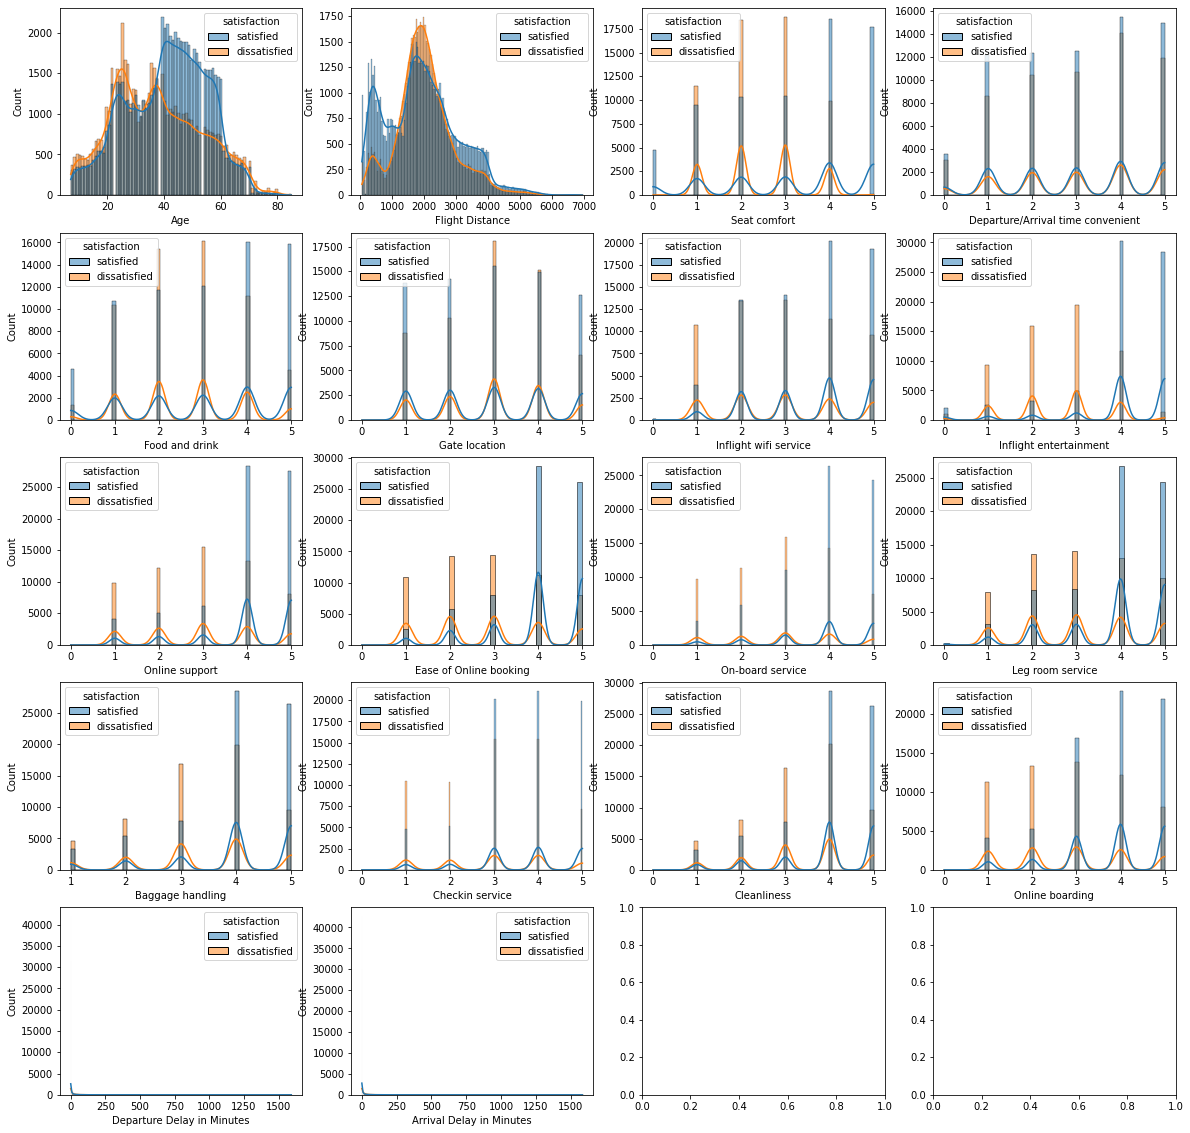

In [39]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))

sns.histplot(data = df, x ='Age',ax=ax[0,0], kde = True, hue ='satisfaction')
sns.histplot(data = df, x ='Flight Distance',ax=ax[0,1],  kde = True, hue ='satisfaction')
sns.histplot(data = df, x ='Seat comfort',ax=ax[0,2],  kde = True, hue ='satisfaction')
sns.histplot(data = df, x ='Departure/Arrival time convenient',ax=ax[0,3], kde = True , hue ='satisfaction')
sns.histplot(data = df, x ='Food and drink',ax=ax[1,0],kde = True, hue ='satisfaction'  )
sns.histplot(data = df, x ='Gate location',ax=ax[1,1],kde = True, hue ='satisfaction'  )
sns.histplot(data = df, x ='Inflight wifi service',ax=ax[1,2],kde = True, hue ='satisfaction'  )
sns.histplot(data = df, x ='Inflight entertainment',ax=ax[1,3],kde = True, hue ='satisfaction'  )
sns.histplot(data = df, x ='Online support',ax=ax[2,0],kde = True, hue ='satisfaction'  )
sns.histplot(data = df, x ='Ease of Online booking',ax=ax[2,1],kde = True, hue ='satisfaction'  )
sns.histplot(data = df, x ='On-board service',ax=ax[2,2],kde = True , hue ='satisfaction' )
sns.histplot(data = df, x ='Leg room service',ax=ax[2,3],kde = True, hue ='satisfaction'  )
sns.histplot(data = df, x ='Baggage handling',ax=ax[3,0],kde = True , hue ='satisfaction' )
sns.histplot(data = df, x ='Checkin service',ax=ax[3,1],kde = True, hue ='satisfaction' )
sns.histplot(data = df, x ='Cleanliness',ax=ax[3,2],kde = True , hue ='satisfaction' )
sns.histplot(data = df, x ='Online boarding',ax=ax[3,3],kde = True , hue ='satisfaction')
sns.histplot(data = df, x ='Departure Delay in Minutes',ax=ax[4,0],kde = True , hue ='satisfaction')
sns.histplot(data = df, x ='Arrival Delay in Minutes',ax=ax[4,1],kde = True  , hue ='satisfaction')

plt.show()

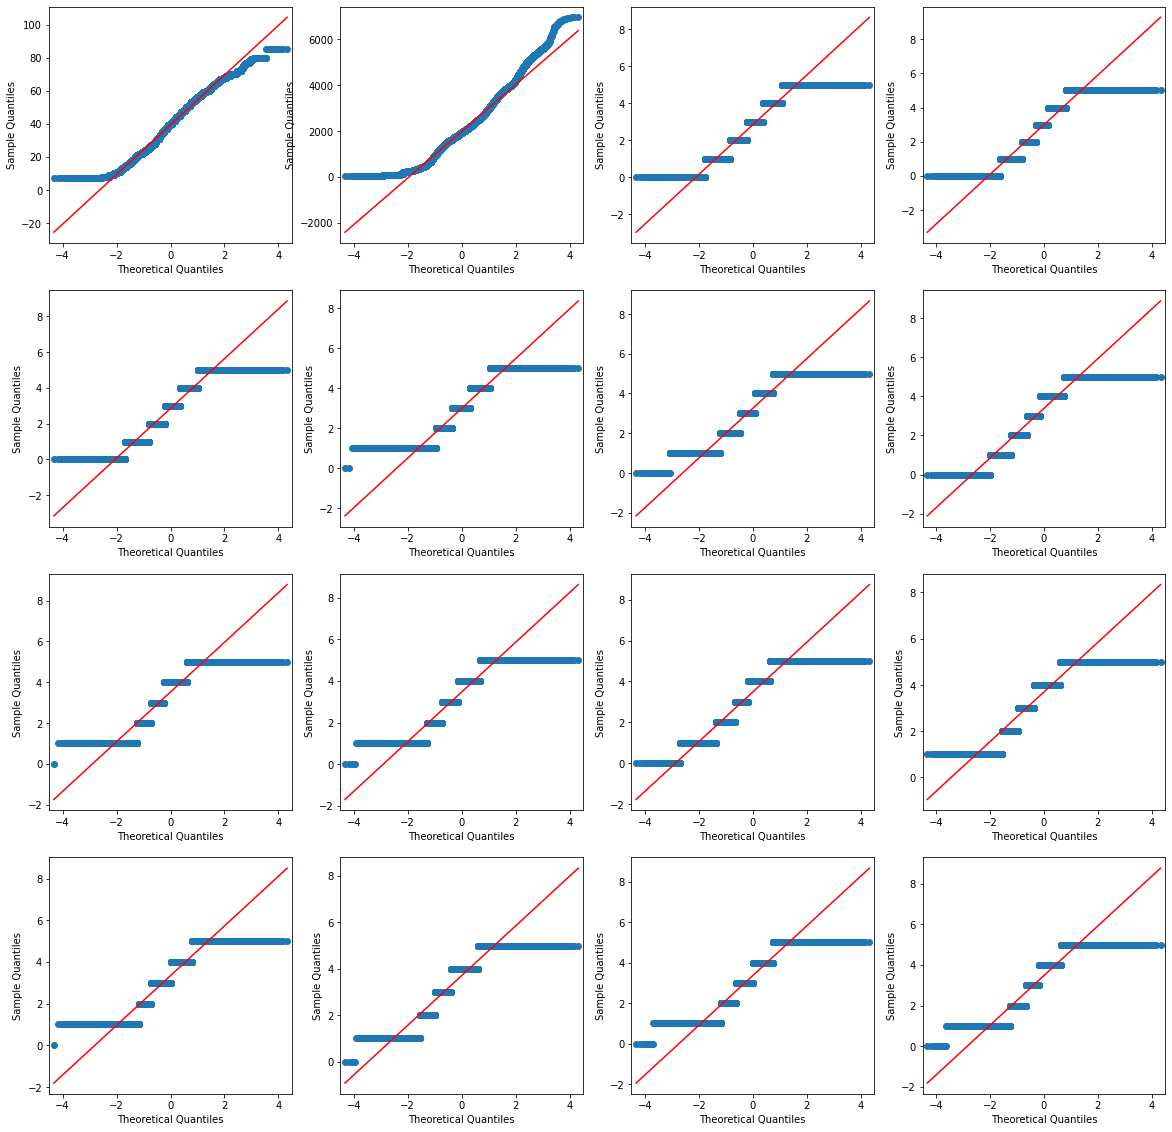

In [15]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

smi.qqplot(df['Age'],line="r", ax = ax[0,0])
smi.qqplot(df['Flight Distance'],line="r", ax = ax[0,1])
smi.qqplot(df['Seat comfort'],line="r", ax = ax[0,2])
smi.qqplot(df['Departure/Arrival time convenient'],line="r", ax = ax[0,3])
smi.qqplot(df['Food and drink'],line="r", ax = ax[1,0])
smi.qqplot(df['Gate location'],line="r", ax = ax[1,1])
smi.qqplot(df['Inflight wifi service'],line="r", ax = ax[1,2])
smi.qqplot(df['Inflight entertainment'],line="r", ax = ax[1,3])
smi.qqplot(df['Online support'],line="r", ax = ax[2,0])
smi.qqplot(df['On-board service'],line="r", ax = ax[2,1])
smi.qqplot(df['Leg room service'],line="r", ax = ax[2,2])
smi.qqplot(df['Baggage handling'],line="r", ax = ax[2,3])
smi.qqplot(df['Checkin service'],line="r", ax = ax[3,0])
smi.qqplot(df['Cleanliness'],line="r", ax = ax[3,1])
smi.qqplot(df['Online boarding'],line="r", ax = ax[3,2])
smi.qqplot(df['Ease of Online booking'],line="r", ax = ax[3,3])


plt.show()


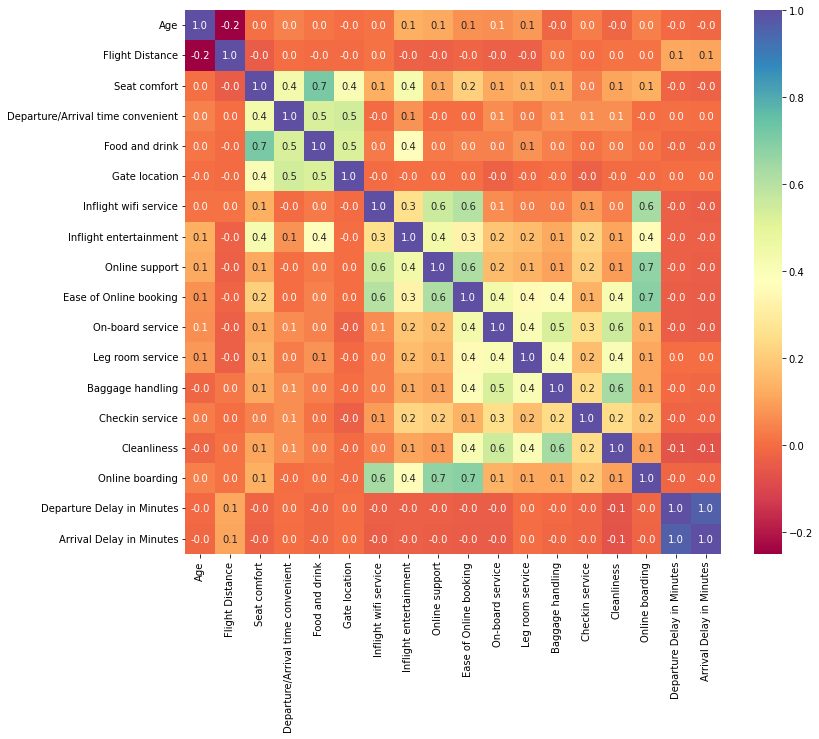

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'Spectral')
plt.show()

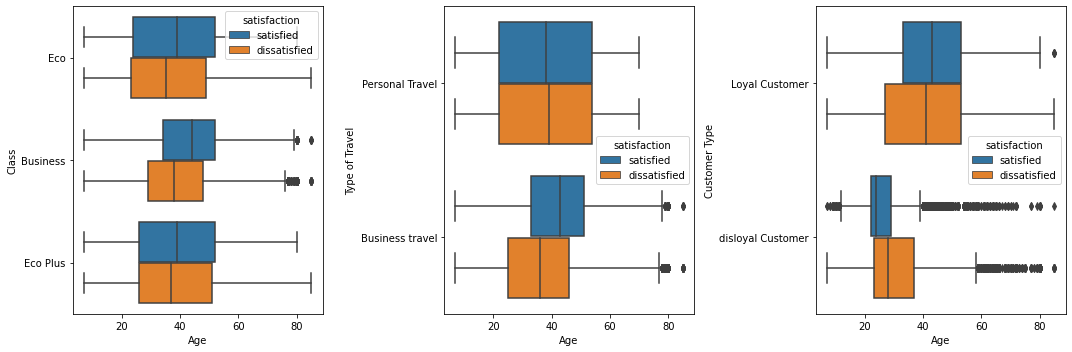

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, x='Age', y='Class', hue ='satisfaction', ax = ax[0])
sns.boxplot(data=df, x='Age', y='Type of Travel', hue ='satisfaction', ax = ax[1])
sns.boxplot(data=df, x='Age', y='Customer Type', hue ='satisfaction', ax = ax[2])
plt.grid(False)
plt.tight_layout()
plt.show()

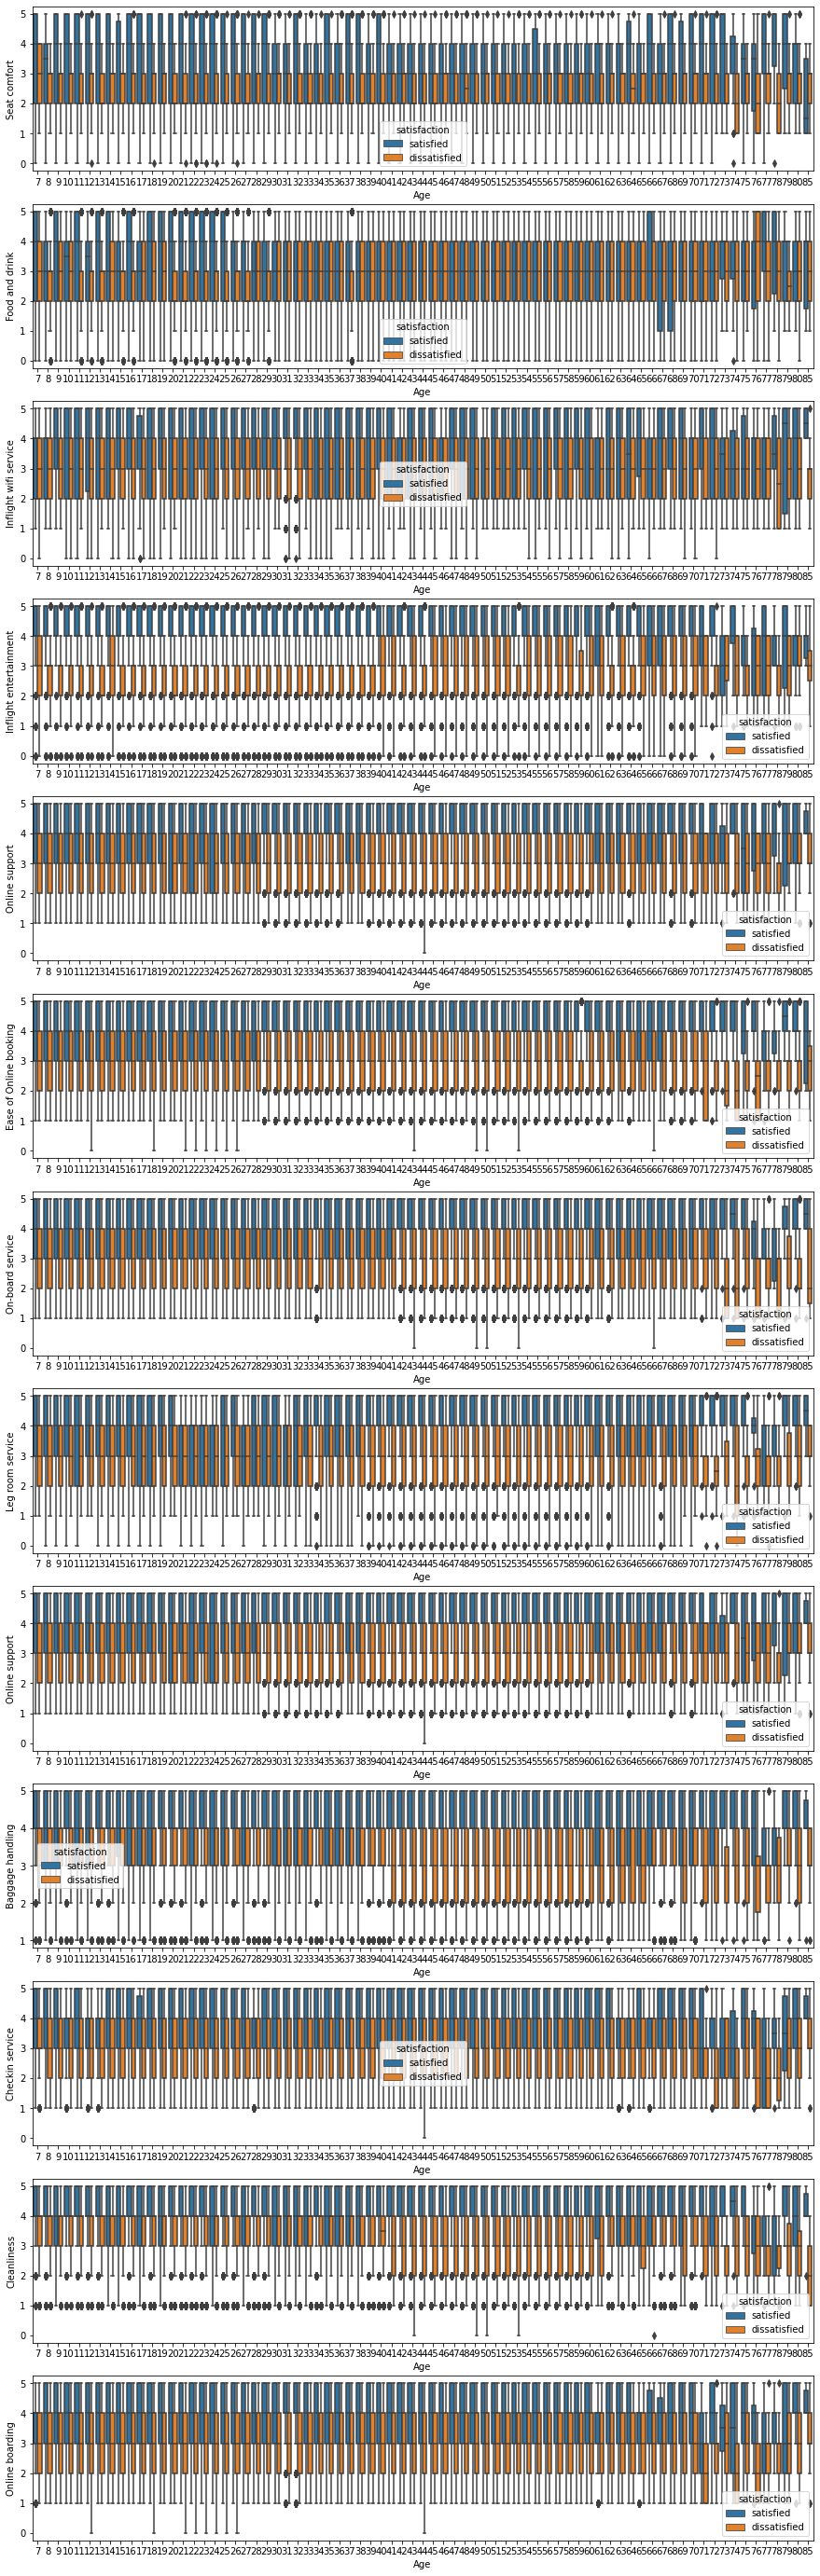

In [22]:
fig, ax = plt.subplots(13, 1, figsize=(15, 50))

sns.boxplot(data=df, x='Age', y='Seat comfort', hue ='satisfaction', ax = ax[0])
sns.boxplot(data=df, x='Age', y='Food and drink', hue ='satisfaction', ax = ax[1])
sns.boxplot(data=df, x='Age', y='Inflight wifi service', hue ='satisfaction', ax = ax[2])
sns.boxplot(data=df, x='Age', y='Inflight entertainment', hue ='satisfaction', ax = ax[3])
sns.boxplot(data=df, x='Age', y='Online support', hue ='satisfaction', ax = ax[4])
sns.boxplot(data=df, x='Age', y='Ease of Online booking', hue ='satisfaction', ax = ax[5])
sns.boxplot(data=df, x='Age', y='On-board service', hue ='satisfaction', ax = ax[6])
sns.boxplot(data=df, x='Age', y='Leg room service', hue ='satisfaction', ax = ax[7])
sns.boxplot(data=df, x='Age', y='Online support', hue ='satisfaction', ax = ax[8])
sns.boxplot(data=df, x='Age', y='Baggage handling', hue ='satisfaction', ax = ax[9])
sns.boxplot(data=df, x='Age', y='Checkin service', hue ='satisfaction', ax = ax[10])
sns.boxplot(data=df, x='Age', y='Cleanliness', hue ='satisfaction', ax = ax[11])
sns.boxplot(data=df, x='Age', y='Online boarding', hue ='satisfaction', ax = ax[12])

plt.show()

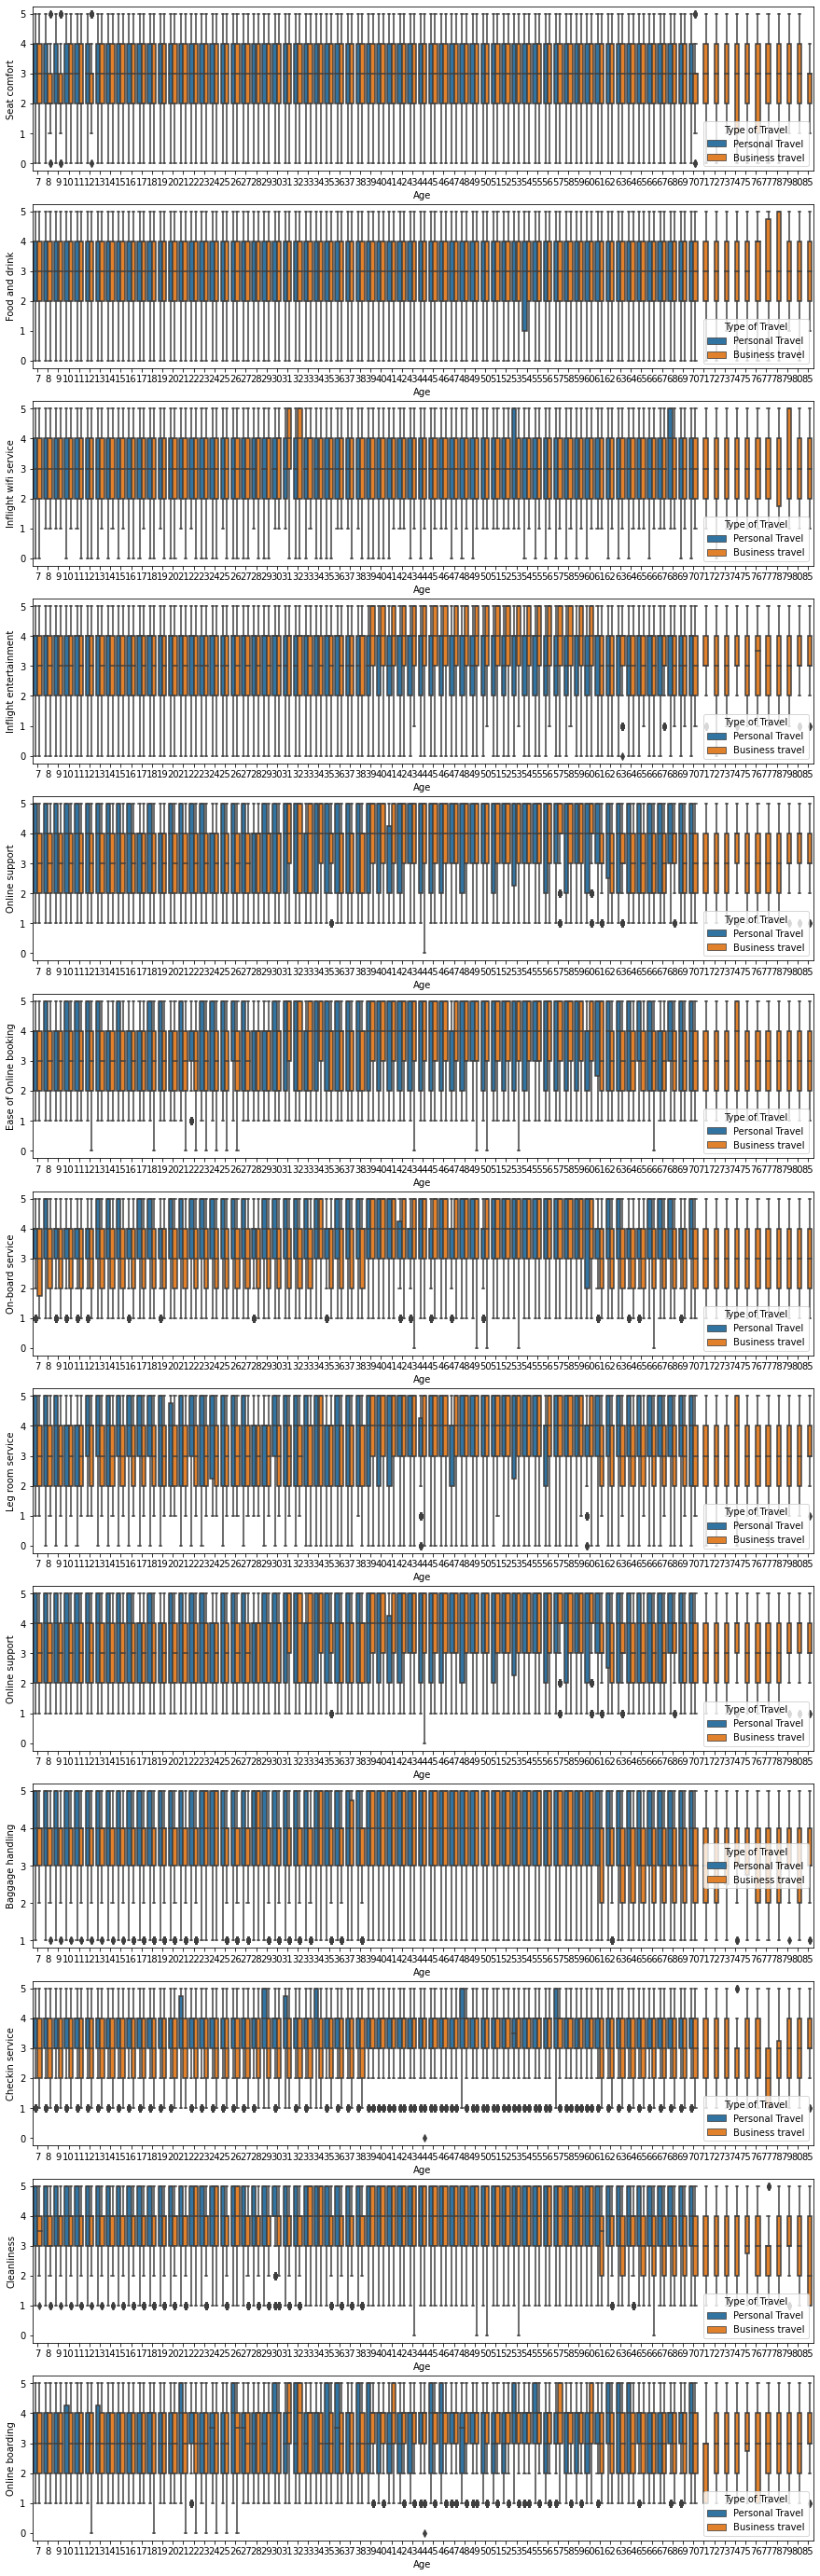

In [35]:
fig, ax = plt.subplots(13, 1, figsize=(15, 50))

sns.boxplot(data=df, x='Age', y='Seat comfort', hue ='Type of Travel', ax = ax[0])
sns.boxplot(data=df, x='Age', y='Food and drink', hue ='Type of Travel', ax = ax[1])
sns.boxplot(data=df, x='Age', y='Inflight wifi service', hue ='Type of Travel', ax = ax[2])
sns.boxplot(data=df, x='Age', y='Inflight entertainment', hue ='Type of Travel', ax = ax[3])
sns.boxplot(data=df, x='Age', y='Online support', hue ='Type of Travel', ax = ax[4])
sns.boxplot(data=df, x='Age', y='Ease of Online booking', hue ='Type of Travel', ax = ax[5])
sns.boxplot(data=df, x='Age', y='On-board service', hue ='Type of Travel', ax = ax[6])
sns.boxplot(data=df, x='Age', y='Leg room service', hue ='Type of Travel', ax = ax[7])
sns.boxplot(data=df, x='Age', y='Online support', hue ='Type of Travel', ax = ax[8])
sns.boxplot(data=df, x='Age', y='Baggage handling', hue ='Type of Travel', ax = ax[9])
sns.boxplot(data=df, x='Age', y='Checkin service', hue ='Type of Travel', ax = ax[10])
sns.boxplot(data=df, x='Age', y='Cleanliness', hue ='Type of Travel', ax = ax[11])
sns.boxplot(data=df, x='Age', y='Online boarding', hue ='Type of Travel', ax = ax[12])

plt.show()

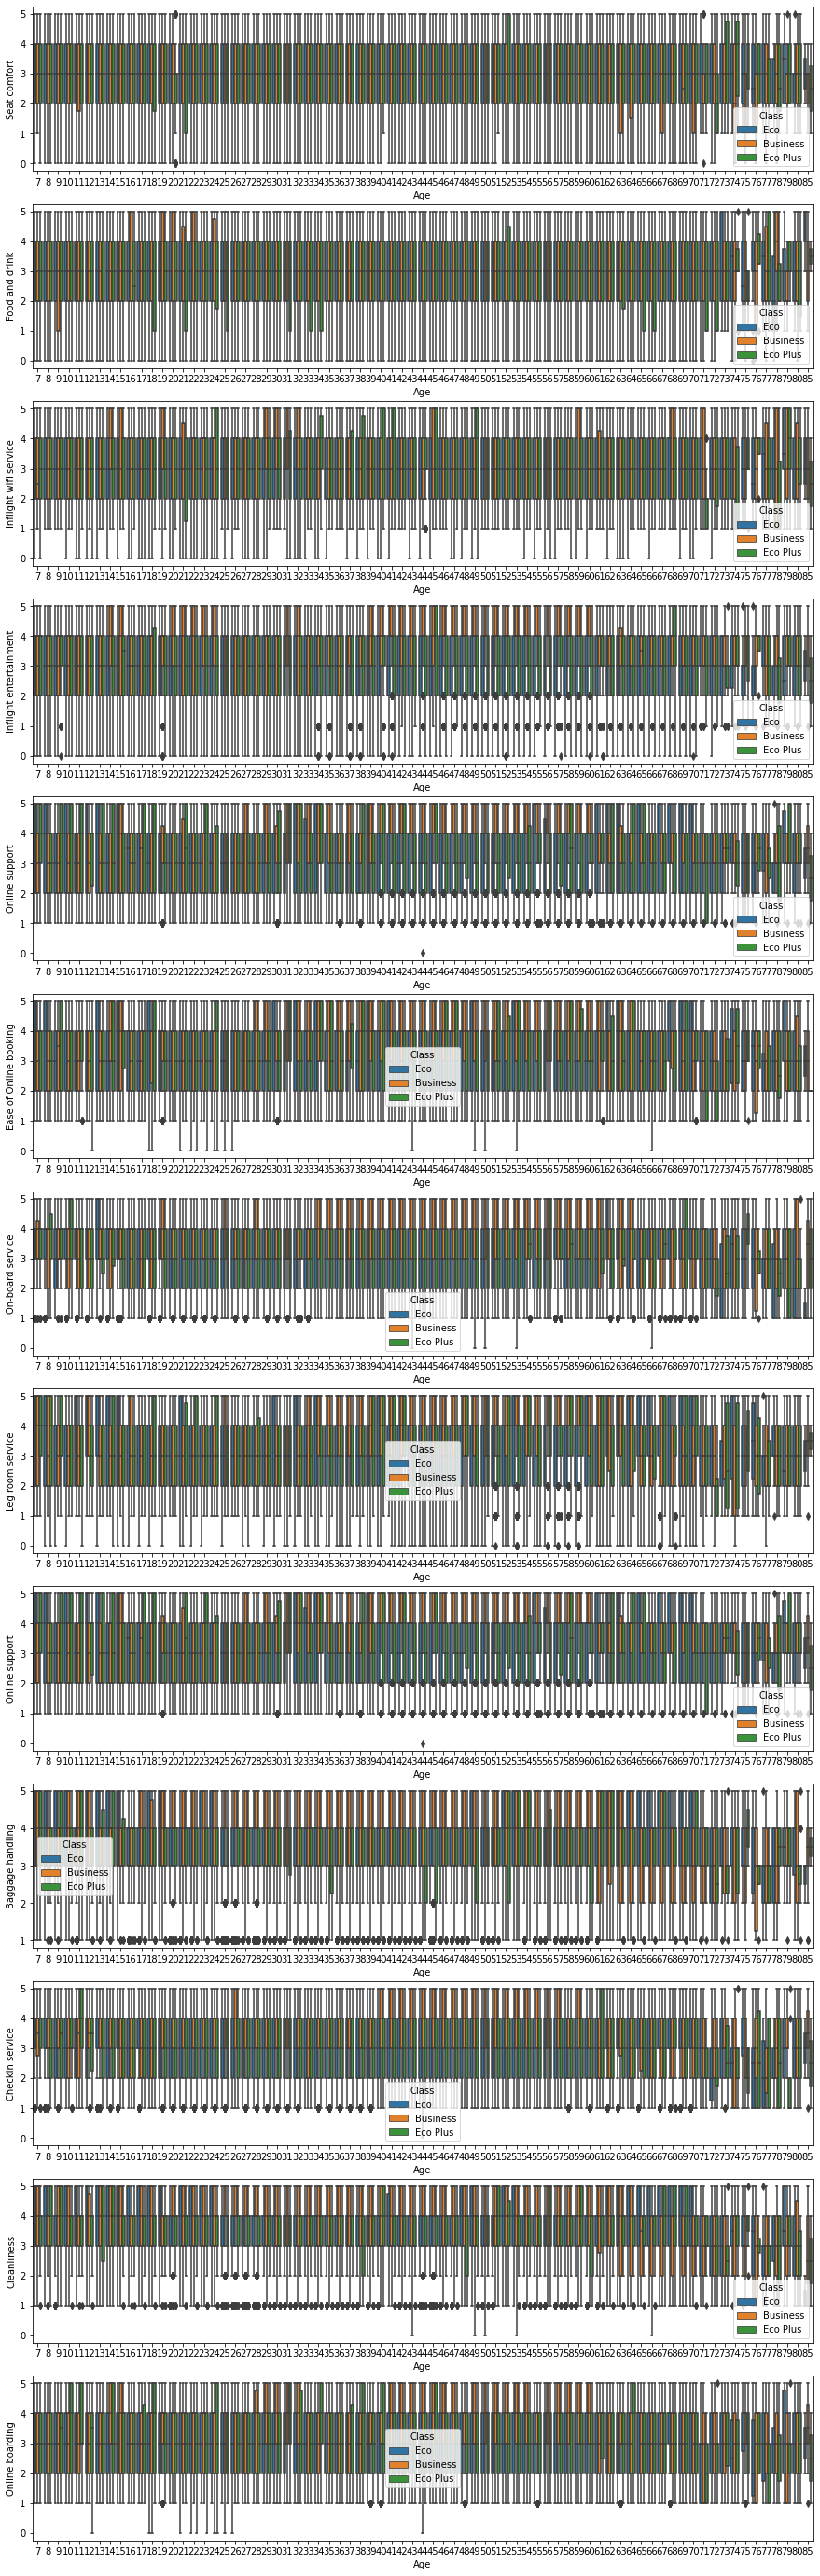

In [37]:
fig, ax = plt.subplots(13, 1, figsize=(15, 50))

sns.boxplot(data=df, x='Age', y='Seat comfort', hue ='Class', ax = ax[0])
sns.boxplot(data=df, x='Age', y='Food and drink', hue ='Class', ax = ax[1])
sns.boxplot(data=df, x='Age', y='Inflight wifi service', hue ='Class', ax = ax[2])
sns.boxplot(data=df, x='Age', y='Inflight entertainment', hue ='Class', ax = ax[3])
sns.boxplot(data=df, x='Age', y='Online support', hue ='Class', ax = ax[4])
sns.boxplot(data=df, x='Age', y='Ease of Online booking', hue ='Class', ax = ax[5])
sns.boxplot(data=df, x='Age', y='On-board service', hue ='Class', ax = ax[6])
sns.boxplot(data=df, x='Age', y='Leg room service', hue ='Class', ax = ax[7])
sns.boxplot(data=df, x='Age', y='Online support', hue ='Class', ax = ax[8])
sns.boxplot(data=df, x='Age', y='Baggage handling', hue ='Class', ax = ax[9])
sns.boxplot(data=df, x='Age', y='Checkin service', hue ='Class', ax = ax[10])
sns.boxplot(data=df, x='Age', y='Cleanliness', hue ='Class', ax = ax[11])
sns.boxplot(data=df, x='Age', y='Online boarding', hue ='Class', ax = ax[12])

plt.show()

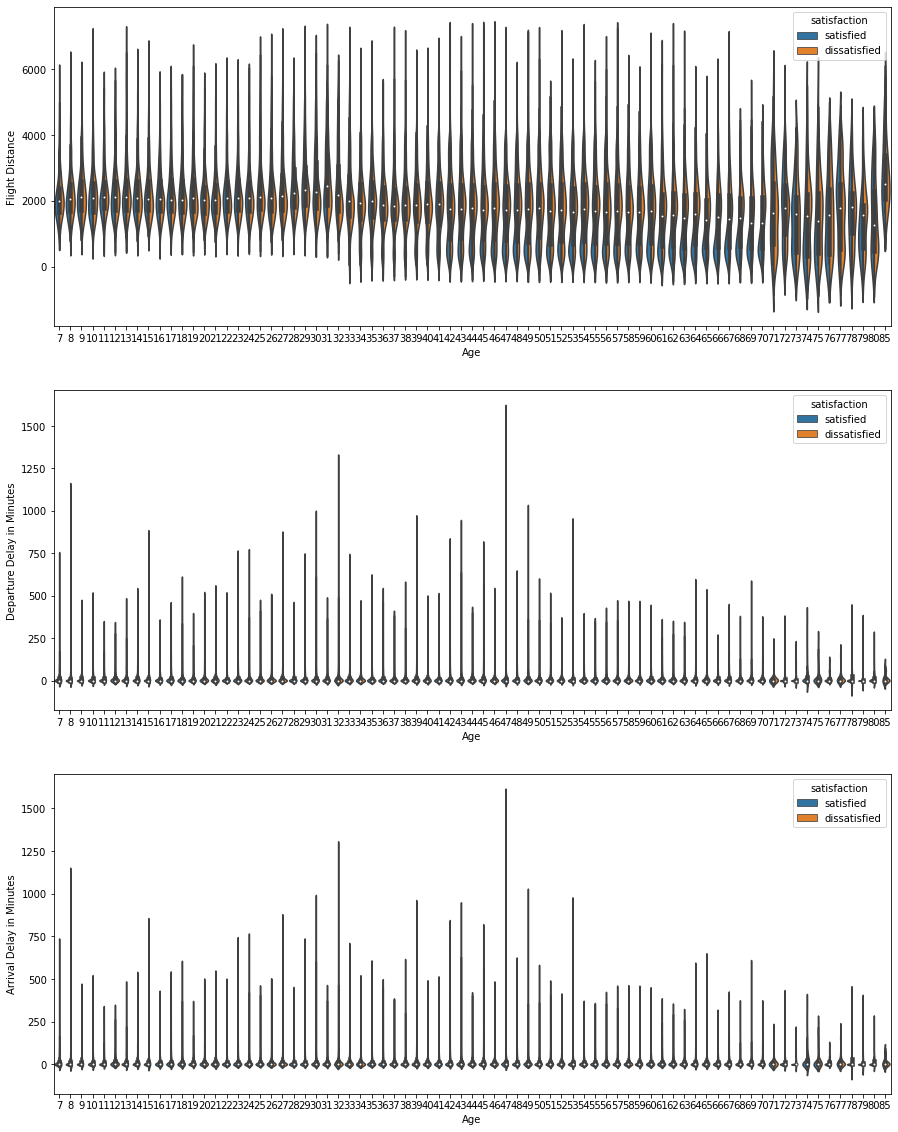

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

sns.violinplot(data=df, x='Age', y='Flight Distance', hue ='satisfaction', split=True, ax = ax[0])
sns.violinplot(data=df, x='Age', y='Departure Delay in Minutes', hue ='satisfaction', split=True, ax = ax[1])
sns.violinplot(data=df, x='Age', y='Arrival Delay in Minutes', hue ='satisfaction', split=True, ax = ax[2])

plt.show()

### Encoder 

In [17]:
lb = LabelEncoder()
df['satisfaction'] = lb.fit_transform(df['satisfaction'])
df['Customer Type'] = lb.fit_transform(df['Customer Type'])
df['Type of Travel'] = lb.fit_transform(df['Type of Travel'])
df['Class'] = lb.fit_transform(df['Class'])
df.head(1)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0


### Select Best Features

In [19]:
X = df.drop(columns=['satisfaction', 'Arrival Delay in Minutes', 'Departure Delay in Minutes'])
y = df['satisfaction']

f_scores, p_values = f_regression(X, y)

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores, 'P_Value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='F_Score', ascending=False)
feature_scores_df

,Feature,F_Score,P_Value
10,Inflight entertainment,49029.186435,0.000000e+00
12,Ease of Online booking,29761.100914,0.000000e+00
11,Online support,23318.295343,0.000000e+00
13,On-board service,18373.892244,0.000000e+00
18,Online boarding,16767.987473,0.000000e+00
14,Leg room service,13314.115992,0.000000e+00
0,Customer Type,12159.896135,0.000000e+00
3,Class,10957.449490,0.000000e+00
16,Checkin service,9903.689497,0.000000e+00
15,Baggage handling,9443.249280,0.000000e+00


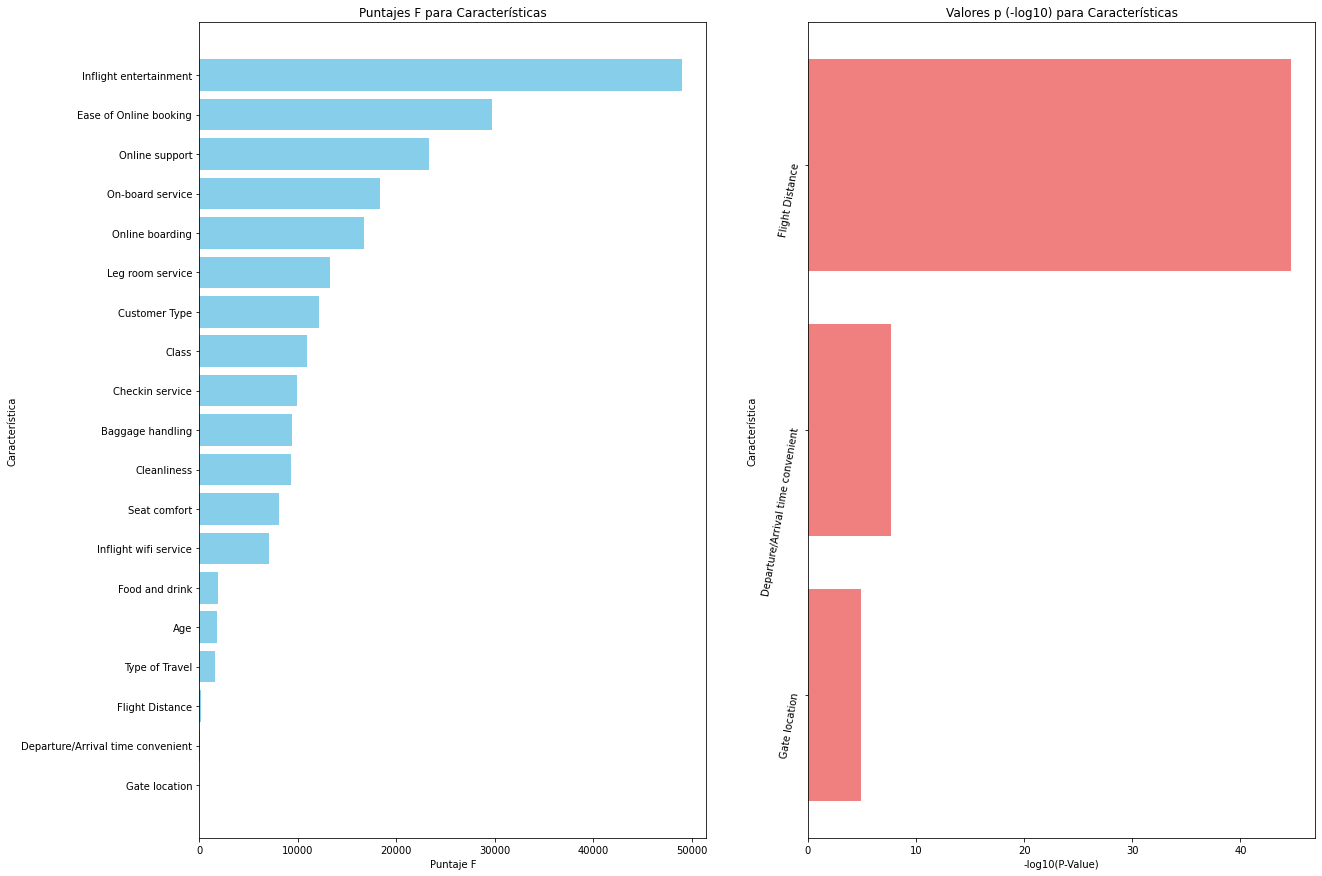

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].barh(feature_scores_df['Feature'], feature_scores_df['F_Score'], color='skyblue')
ax[0].set_xlabel('Puntaje F')
ax[0].set_ylabel('Característica')
ax[0].set_title('Puntajes F para Características')


ax[1].barh(feature_scores_df['Feature'], -np.log10(feature_scores_df['P_Value']), color='lightcoral')
ax[1].set_xlabel('-log10(P-Value)')
ax[1].set_ylabel('Característica')
ax[1].set_title('Valores p (-log10) para Características')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.yticks(rotation=80)
plt.show()

In [27]:
cols = feature_scores_df[feature_scores_df['F_Score']>=1].Feature.to_list()

### Modeling and Evaluation

In [29]:
X_M = df[cols]
Y_M = df['satisfaction']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)    

### Train Test Split 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3, random_state=42)

### Logistic Regression

In [31]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     17554
           1       0.84      0.84      0.84     21410

    accuracy                           0.82     38964
   macro avg       0.82      0.82      0.82     38964
weighted avg       0.82      0.82      0.82     38964

accuracy:  0.8244533415460426
mean_absolute_error:  0.1755466584539575
mean_squared_error:  0.1755466584539575


### Random Forest Classifier

In [32]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17554
           1       0.97      0.95      0.96     21410

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964

accuracy:  0.9565239708448825
mean_absolute_error:  0.04347602915511754
mean_squared_error:  0.04347602915511754


### Decision Tree

In [33]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     17554
           1       0.94      0.94      0.94     21410

    accuracy                           0.93     38964
   macro avg       0.93      0.93      0.93     38964
weighted avg       0.93      0.93      0.93     38964

accuracy:  0.9339390206344318
mean_absolute_error:  0.06606097936556822
mean_squared_error:  0.06606097936556822


### SVC 

In [34]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     17554
           1       0.85      0.83      0.84     21410

    accuracy                           0.83     38964
   macro avg       0.83      0.83      0.83     38964
weighted avg       0.83      0.83      0.83     38964

accuracy:  0.8289703315881326
mean_absolute_error:  0.17102966841186737
mean_squared_error:  0.17102966841186737


### KNeighborsClassifier

In [35]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     17554
           1       0.95      0.91      0.93     21410

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964

accuracy:  0.9228518632583924
mean_absolute_error:  0.07714813674160764
mean_squared_error:  0.07714813674160764


1    21410
0    17554
Name: satisfaction, dtype: int64


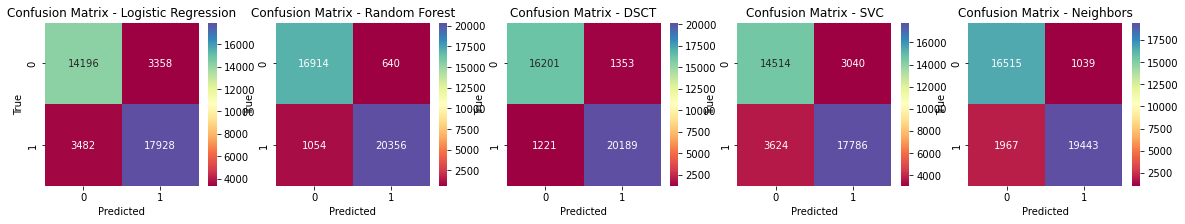

In [36]:
from sklearn.metrics import confusion_matrix

RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Spectral', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Spectral', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Spectral', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Spectral', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Spectral', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

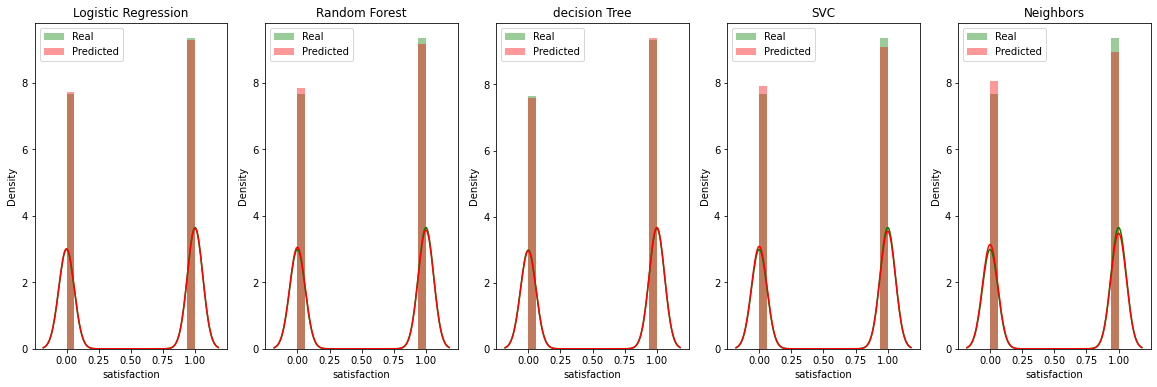

In [37]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()